# The Eaton and Palisades Fires
## Exploring the extent and impact of the Eaton and Palisades fires in Los Angeles County
Use of false-color imagery and Landsat data to assess impacts of fire.

![](fire.jpg)

Photo of homes burning right next to the ocean. 

Photo credit: Cal-Fire. 

Link: https://commons.wikimedia.org/wiki/File:Palisades_Fire_(54253581167).jpg
 

## Background
The Eaton and Palisades fires in Los Angeles County started in January 7, 2025 and subsequently burned over 20,000 acres, devastating local communities, damaging thousands of homes and many acres of ecological habitat, and leaving deep scars in both the communities they affected and the land itself. In this study, we will visualize the extents and impacts of the Eaton and Palisades fires using false color imagery through Landsat data and known perimeters of both fires, and focus in on an environmental justice metric to assess the community's potential response to wildfire.

To learn more about false color images and landsats, see the following resources:

[Why is that Forest Red and that Cloud Blue? How to Interpret a False-Color Satellite Image](https://earthobservatory.nasa.gov/features/FalseColor)

[What are the band designations for the Landsat satellites?](https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites)

[Common Landsat Band Combinations](https://www.usgs.gov/media/images/common-landsat-band-combinations)

### Analysis Highlights

In this study, we will highlight the following skills:

1.  Examining rioxarrays and NetCDF files to pull, transform, and manipulate spatial data.
2.  Map true and false color images from NetCDF files.
3.  Map census tracts that intersect the Eaton and Palisades fires to explore potential injustices.

### Datasets:

Landsat data are from [Microsoft Planetary Computer data catalogue](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2). These data contain bands for red, green, blue, near-infrared and shortwave infrared, from the Landsat Collection 2 Level-2 collected by Landsat-8. Our data is cropped to areas surrounding the extent of the fires.

Perimeter data are from [Los Angeles County Dissolved Fire Perimeter Data](https://geohub.lacity.org/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about). These data originate from data containing daily snapshots of perimeters, but are dissolved into one layer for these data.

Fire perimeter data: https://geohub.lacity.org/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about Landsat data: https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2

EJI data are from the [Environmental Justice Index (EJI)](https://www.atsdr.cdc.gov/place-health/php/eji/eji-data-download.html), a national tool to measure environmental burden. The EJI ranks tracts for 36 different factors developed from data from many different sources.

### Repository:
All code and output for this blogpost are housed on [GitHub](https://github.com/lsdixit/eaton_palisades_fires).

Begin by loading all necessary libraries and data.

In [2]:
# Load libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar

In [4]:
# Load data

# Read in NetCDF file
fp_landsat = os.path.join("data", "landsat8-2025-02-23-palisades-eaton.nc")
landsat = xr.open_dataset(fp_landsat)

# Read in perimeter data
fp_eaton = os.path.join("data", "Eaton_Perimeter", "Eaton_Perimeter_20250121.shp")
fp_palisades = os.path.join("data", "Palisades_Perimeter", "Palisades_Perimeter_20250121.shp")
eaton_perimeter = gpd.read_file(fp_eaton)
palisades_perimeter = gpd.read_file(fp_palisades)

# Import CA EJI gdb
fp = os.path.join("data", "EJI_2024_California", "EJI_2024_California.gdb")
eji_california = gpd.read_file(fp)

# Part 1: Visualize extent of fires using false color imagery

Multispectral mages can be with a combination of three bands of color: red, green, and blue (RGB). A true color image (like most images we see on a computer) have the correctly assigned bands to each of these three channels: the red band in the red channel, green band in the green channel, and blue band in the blue channel. False color imagery is the process of assigning the "wrong" bands to corresponding RGB channels. This can help the viewer view bands not usually visible to the human eye (e.g near infrared or short-wave infrared), and also to better highlight aspects of topography of interest for remote sensing needs such as monitoring floods or vegetation loss. In this project, we will be using false color imagery to highlight areas that have had extensive damage due to fires by assigning short wave infrared (SWIR) and near infrared (NIR) to our RGB channels. 

First we will check the crs of our perimeter data and make sure they match our Landsat data and are projected so we can map them. We will transform our perimeter data to match our Landsat data's CRS of `EPSG:32611`.

In [3]:
print(f"CRS before: {palisades_perimeter.crs}")
print(f"CRS before: {eaton_perimeter.crs}")

# Update CRS to match the landsat data
palisades_perimeter = palisades_perimeter.to_crs('epsg:32611')
eaton_perimeter = eaton_perimeter.to_crs('epsg:32611')

# Check the transformation worked
print(f"CRS after: {palisades_perimeter.crs}")
print(f"CRS after: {eaton_perimeter.crs}")

CRS before: EPSG:3857
CRS before: EPSG:3857
CRS after: epsg:32611
CRS after: epsg:32611


We need to restore geospatial information to our Landsat data as it is currently stored in the `spatial_ref` attribute.

In [4]:
# Pull out the CRS information by accessing that attribute
landsat.spatial_ref.crs_wkt

# Assign the correct crs to the data
landsat.rio.write_crs(32611, inplace = True)

# Check crs is correctly applied
print(landsat.rio.crs)

EPSG:32611


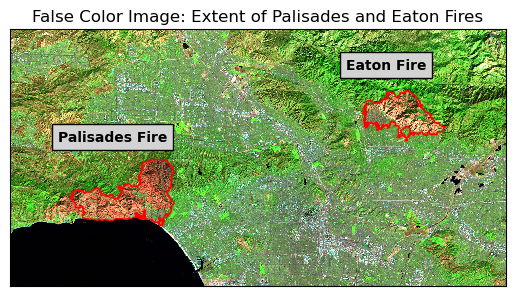

In [5]:
fig, ax = plt.subplots()

# Plot the false color landsat map
landsat[['swir22', 'nir08', 'red']].fillna(0).to_array().plot.imshow(robust = True)

# Plot perimeters overlayed on the false color map
palisades_perimeter.plot(ax=ax, color = 'none', edgecolor='red')
eaton_perimeter.plot(ax=ax, color = 'none', edgecolor='red')

# Set title
ax.set_title("False Color Image: Extent of Palisades and Eaton Fires")

# Add labels for each fire
plt.figtext(x = .65,
            y = .68,
            s ="Eaton Fire",
            weight = 'bold',
            bbox=dict(facecolor='lightgray', edgecolor='black'))
plt.figtext(x = .2,
            y = .53,
            s ="Palisades Fire",
            weight = 'bold',
            bbox=dict(facecolor='lightgray', edgecolor='black'))

# Remove axes ticks
ax.set_xticks([])  
ax.set_yticks([])  

# Remove axes labels
ax.set_xlabel("")  
ax.set_ylabel("") 

plt.show()

Here we are visualizing landsat data from Los Angeles County, focusing on the areas encompassing the Palisades and Eaton fires from January 2025. This is a false color image, with short-wave infrared assigned to red, near-infrared assigned to blue, and red assigned to green. Short-wave infrared highlights recently burned areas, and near-infrared highlights areas of healthy vegetation. With this method, we are able to easily identify fire scars left behind from the large fires, identified by the red color on the map. Overlayed are known perimeters of each fire, and we can see the perimeters and scars identified by landsat are very similar.

Now we will dive deeper into the socioeconomic attributes of the communities affected by each fire.

# Part 2: Social dimensions of Eaton and Palisades fires

Once again, we need to make sure our EJI data match the crs of our perimeter data. We will transform the EJI data to match our perimeter data's CRS, and then join and clip each fire perimeter with the EJI data.

In [6]:
# Transform crs of EJI data to match perimeter data, and join with perimeter data
eji_california = eji_california.to_crs(palisades_perimeter.crs)
eji_palisades = gpd.sjoin(eji_california, palisades_perimeter, predicate = 'intersects')

eji_california = eji_california.to_crs(eaton_perimeter.crs)
eji_eaton = gpd.sjoin(eji_california, eaton_perimeter, predicate = 'intersects')

In [7]:
# Clip census tract data to extents of perimeter data
eji_palisades_clipped = gpd.clip(eji_california, palisades_perimeter)
eji_eaton_clipped = gpd.clip(eji_california, eaton_perimeter)

Next we will visualize fire perimeters over a street map to see which areas of the city were affected.

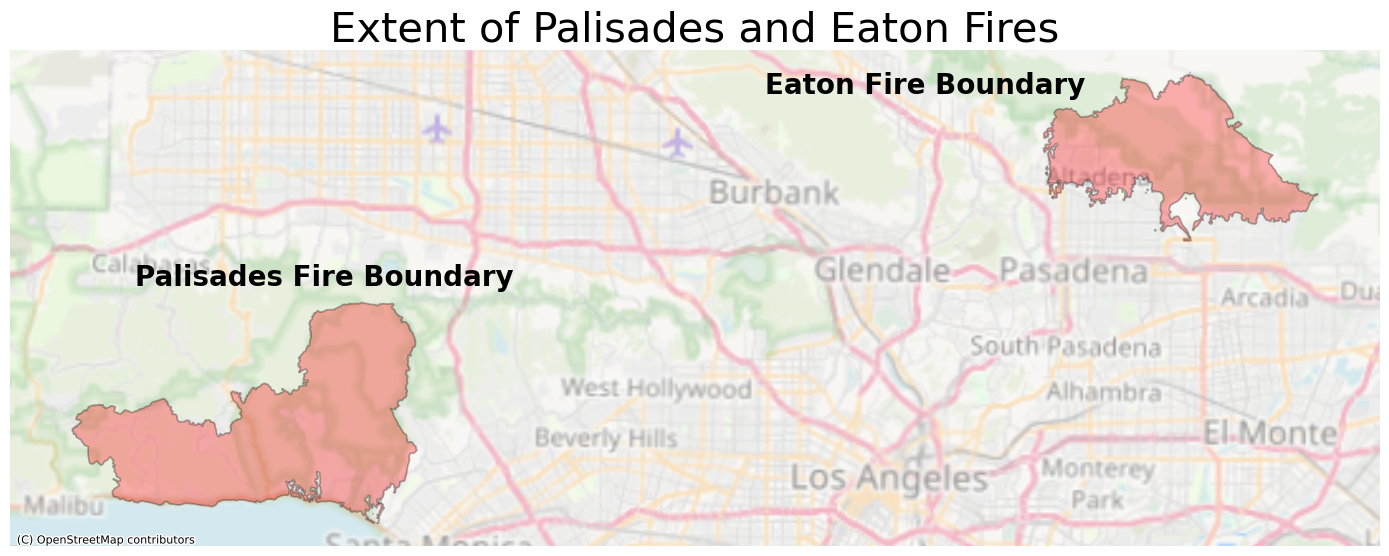

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Plot fire perimeters
palisades_perimeter.plot(ax=ax,
                       edgecolor = 'black',
                       color='red',
                       linewidth=1.25,
                       alpha=0.3)
eaton_perimeter.plot(ax=ax,
                   edgecolor = 'black',
                   color='red',
                   linewidth=1.25,
                   alpha=0.3)

# Add label to identify each fire
plt.figtext(x = .55,
            y = .67,
            s ="Eaton Fire Boundary",
            weight = 'bold',
            fontsize=20)
plt.figtext(x = .1,
            y = .51,
            s ="Palisades Fire Boundary",
            weight = 'bold',
            fontsize=20)

# Add basemap using contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=palisades_perimeter.crs, alpha = 0.5)

# Add title
ax.set_title("Extent of Palisades and Eaton Fires", fontsize=30)
# Turn off latitude and longitude axes
ax.axis('off')

plt.tight_layout()
plt.show()

We can see the area of the Palisades fire is mostly out of the metropolitan areas of Los Angeles and into the more spread out, coastal area. The Eaton fire is also largely vegetation, but encompass areas of Altadena and some surrounding city.

Now we will look at census tracts for the percentage of persons who identify as a minority in each fire's affected area.

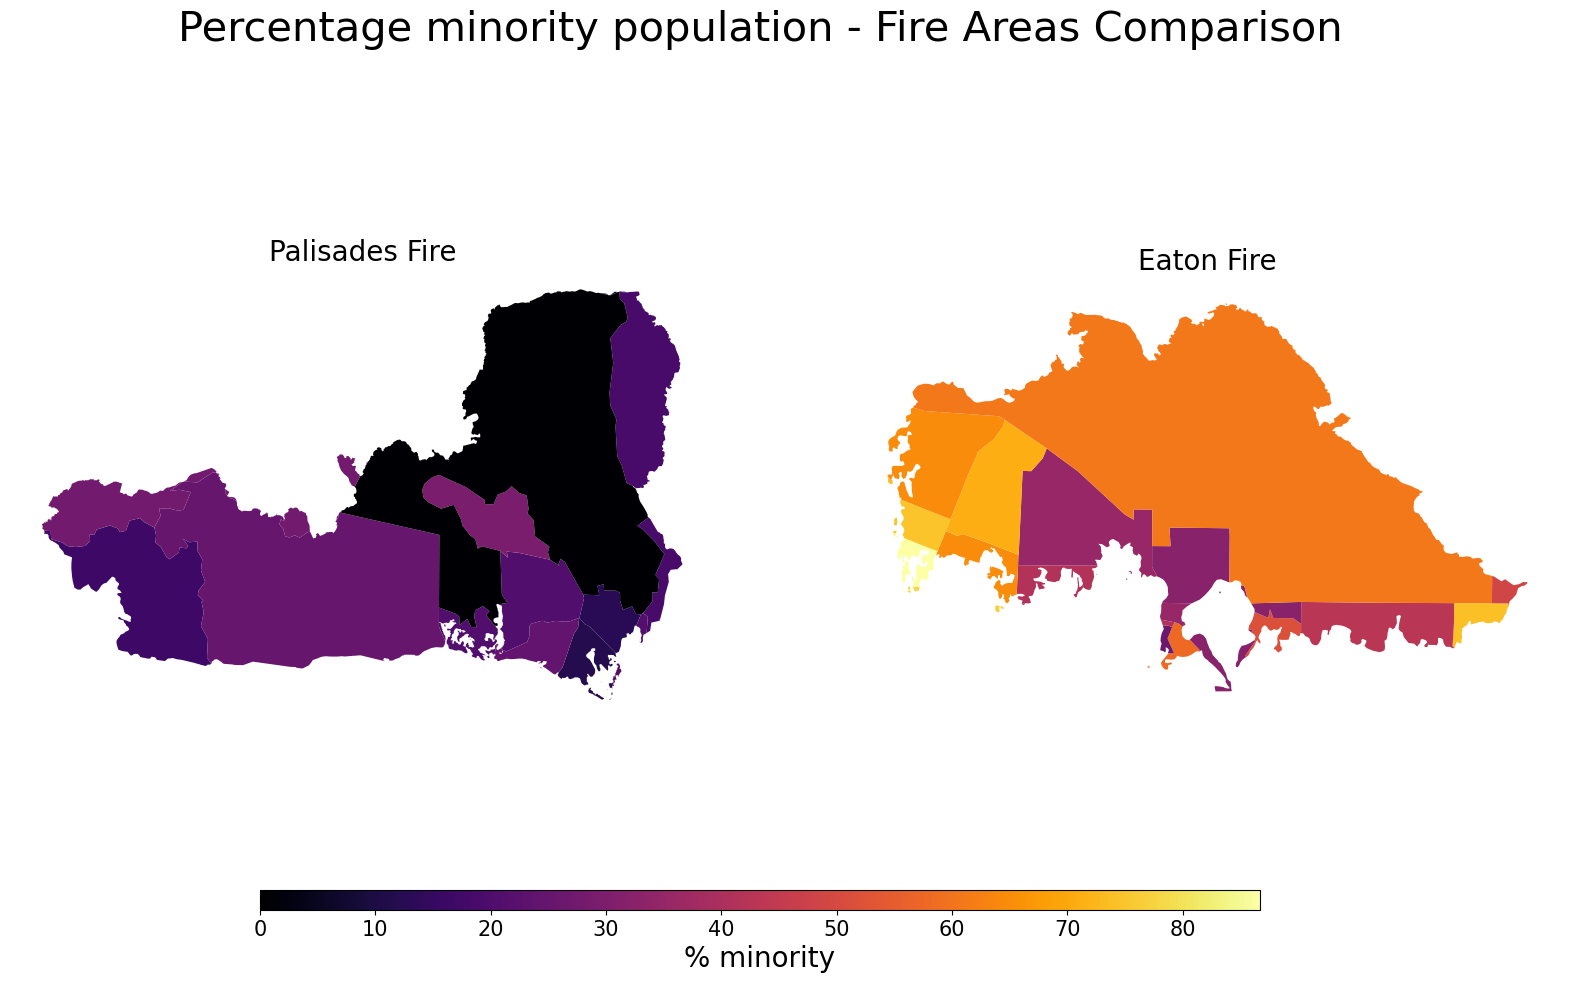

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Assign EJI variable of % minority
eji_variable = 'E_MINRTY'

# Find common min/max for legend range
vmin = min(eji_palisades_clipped[eji_variable].min(), eji_eaton_clipped[eji_variable].min())
vmax = max(eji_palisades_clipped[eji_variable].max(), eji_eaton_clipped[eji_variable].max())

# Plot census tracts within Palisades perimeter
eji_palisades_clipped.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
    cmap = 'inferno')
# Add title
ax1.set_title('Palisades Fire', fontsize=20)
# Turn off latitude and longitude axes
ax1.axis('off')

# Plot census tracts within Eaton perimeter
eji_eaton_clipped.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
    cmap = 'inferno')
# Add title
ax2.set_title('Eaton Fire', fontsize=20)
# Turn off latitude and longitude axes
ax2.axis('off')

# Add overall title
fig.suptitle('Percentage minority population - Fire Areas Comparison', fontsize=30)

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap = 'inferno')
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('% minority', fontsize=20)
cbar.ax.tick_params(labelsize=15)

plt.show()

Despite its smaller acreage, we can clearly see that the Eaton fire disproportionately affected an area with a much higher minority population than the Palisades fire. Through these visualizations, we can begin to explain a potential pattern of environmental injustice in this area of Los Angeles that may become exacerbated with the increase in natural disasters caused by climate change.